In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

ds = load_dataset("Magneto/modified-medical-dialogue-soap-summary")
tokenizer = AutoTokenizer.from_pretrained("Falconsai/medical_summarization")

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("blaze999/Medical-NER")
model = AutoModelForTokenClassification.from_pretrained("blaze999/Medical-NER")

# Create an NER pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)


texts=ds["train"]["output"]


S_entities=[]
O_entities=[]
A_entities=[]
P_entities=[]
sum=0
count=0
for text in texts[:500]:
  text=text.split("\n")
  sum=0
  count+=1
  for i in text:
      sum+=1
      entities_sample=ner_pipeline(i)
      if sum==1:
        for a in entities_sample:
            S_entities.append([a["entity"],a["word"]])
      if sum==2:
        for a in entities_sample:
            O_entities.append([a["entity"],a["word"]])
      if sum==3:
        for a in entities_sample:
            A_entities.append([a["entity"],a["word"]])

      if sum==4:
        for a in entities_sample:
            P_entities.append([a["entity"],a["word"]])

      print("Sample no.",count)
      print(len(S_entities))









In [ ]:
len(S_entities)

47

In [ ]:

# Convert lists to DataFrames
S_df = pd.DataFrame(S_entities, columns=["Entity","Word"])
O_df = pd.DataFrame(O_entities, columns=["Entity","Word"])
A_df = pd.DataFrame(A_entities, columns=["Entity","Word"])
P_df = pd.DataFrame(P_entities, columns=["Entity","Word"])

# Saving to CSV
S_path = '/content/drive/MyDrive/MT_speech/SOAP_Files/S_entities.csv'
O_path = '/content/drive/MyDrive/MT_speech/SOAP_Files/O_entities.csv'
A_path = '/content/drive/MyDrive/MT_speech/SOAP_Files/A_entities.csv'
P_path = '/content/drive/MyDrive/MT_speech/SOAP_Files/P_entities.csv'

S_df.to_csv(S_path, index=False)
O_df.to_csv(O_path, index=False)
A_df.to_csv(A_path, index=False)
P_df.to_csv(P_path, index=False)

S_path, O_path, A_path, P_path


('/content/drive/MyDrive/MT_speech/SOAP_Files/S_entities.csv',
 '/content/drive/MyDrive/MT_speech/SOAP_Files/O_entities.csv',
 '/content/drive/MyDrive/MT_speech/SOAP_Files/A_entities.csv',
 '/content/drive/MyDrive/MT_speech/SOAP_Files/P_entities.csv')

In [ ]:
S={}
O={}
A={}
P={}

import pandas as pd
S_df = pd.read_csv('/content/S_entities.csv')
o_df = pd.read_csv('/content/O_entities.csv')
a_df = pd.read_csv('/content/A_entities.csv')
p_df = pd.read_csv('/content/P_entities.csv')


for index, row in S_df.iterrows():
    entity = row['Entity']
    entity=entity.replace("B-","")
    entity=entity.replace("I-","")
    if entity not in S:
        S[entity]=1
    else:
        S[entity]+=1

for index, row in o_df.iterrows():
    entity = row['Entity']
    entity=entity.replace("B-","")
    entity=entity.replace("I-","")
    if entity not in O:
        O[entity]=1
    else:
        O[entity]+=1

for index, row in a_df.iterrows():
    entity = row['Entity']
    entity=entity.replace("B-","")
    entity=entity.replace("I-","")
    if entity not in A:
        A[entity]=1
    else:
        A[entity]+=1

for index, row in p_df.iterrows():
    entity = row['Entity']
    entity=entity.replace("B-","")
    entity=entity.replace("I-","")
    if entity not in P:
        P[entity]=1
    else:
        P[entity]+=1

S,O,A,P

({'AGE': 837,
  'SEX': 173,
  'SEVERITY': 151,
  'DISTANCE': 40,
  'SIGN_SYMPTOM': 3132,
  'DISEASE_DISORDER': 1549,
  'BIOLOGICAL_STRUCTURE': 1521,
  'CLINICAL_EVENT': 250,
  'MEDICATION': 922,
  'DETAILED_DESCRIPTION': 1703,
  'DURATION': 837,
  'HISTORY': 2180,
  'FAMILY_HISTORY': 442,
  'LAB_VALUE': 476,
  'THERAPEUTIC_PROCEDURE': 666,
  'DATE': 763,
  'NONBIOLOGICAL_LOCATION': 167,
  'DOSAGE': 240,
  'DIAGNOSTIC_PROCEDURE': 464,
  'PERSONAL_BACKGROUND': 15,
  'AREA': 28},
 {'DIAGNOSTIC_PROCEDURE': 9296,
  'BIOLOGICAL_STRUCTURE': 5335,
  'DISEASE_DISORDER': 1758,
  'SIGN_SYMPTOM': 4034,
  'DETAILED_DESCRIPTION': 3483,
  'LAB_VALUE': 7863,
  'DISTANCE': 314,
  'SEVERITY': 268,
  'DURATION': 66,
  'AREA': 462,
  'THERAPEUTIC_PROCEDURE': 838,
  'NONBIOLOGICAL_LOCATION': 103,
  'MEDICATION': 690,
  'CLINICAL_EVENT': 76,
  'DATE': 318,
  'COREFERENCE': 9,
  'DOSAGE': 334,
  'AGE': 29,
  'HISTORY': 20,
  'SEX': 3,
  'FAMILY_HISTORY': 25,
  'VOLUME': 46,
  'ADMINISTRATION': 3},
 {'DISEASE

In [ ]:
S_W = {}  # Changed from S
O_W = {}  # Changed from O
A_W = {}  # Changed from A
P_W = {}  # Changed from P

for index, row in S_df.iterrows():
    word = row['Word']
    word=str(word)
    word = word.replace("B-", "")
    word = word.replace("I-", "")
    word=word.lower()
    word=word.replace("-","")
    word=word.replace("▁","")
    if len(word)<=1:
      continue
    if word not in S_W:  # Changed from S
        S_W[word] = 1  # Changed from S
    else:
        S_W[word] += 1  # Changed from S

for index, row in o_df.iterrows():
    word = row['Word']
    word=str(word)
    word = word.replace("B-", "")
    word = word.replace("I-", "")
    word=word.lower()
    word=word.replace("-","")
    word=word.replace("▁","")
    if len(word)<=1:
      continue
    if word not in O_W:  # Changed from O
        O_W[word] = 1  # Changed from O
    else:
        O_W[word] += 1  # Changed from O

for index, row in a_df.iterrows():
    word = row['Word']
    word=str(word)
    word = word.replace("B-", "")
    word = word.replace("I-", "")
    word=word.lower()
    word=word.replace("-","")
    word=word.replace("▁","")
    if len(word)<=1:
      continue
    if word not in A_W:  # Changed from A
        A_W[word] = 1  # Changed from A
    else:
        A_W[word] += 1  # Changed from A

for index, row in p_df.iterrows():
    word = row['Word']
    word=str(word)
    word = word.replace("B-", "")
    word = word.replace("I-", "")
    word=word.lower()
    word=word.replace("-","")
    word=word.replace("▁","")
    if len(word)<=1:
      continue
    if word not in P_W:  # Changed from P
        P_W[word] = 1  # Changed from P
    else:
        P_W[word] += 1  # Changed from P

S_W, O_W, A_W, P_W  # Changed from S, O, A, P

In [ ]:
S_top = sorted(S_W.items(), key=lambda x: x[1], reverse=True)[:10]
O_top = sorted(O_W.items(), key=lambda x: x[1], reverse=True)[:10]
A_top = sorted(A_W.items(), key=lambda x: x[1], reverse=True)[:10]
P_top = sorted(P_W.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the sorted top 10 keys for each dictionary
S_top, O_top, A_top, P_top

([('pain', 219),
  ('of', 190),
  ('year', 186),
  ('old', 160),
  ('left', 122),
  ('right', 114),
  ('months', 105),
  ('years', 103),
  ('history', 103),
  ('or', 97)],
 [('examination', 352),
  ('left', 280),
  ('blood', 259),
  ('normal', 244),
  ('right', 236),
  ('dl', 224),
  ('mg', 219),
  ('ct', 205),
  ('physical', 196),
  ('mm', 160)],
 [('infection', 56),
  ('disease', 55),
  ('severe', 53),
  ('right', 52),
  ('left', 50),
  ('tumor', 49),
  ('syndrome', 45),
  ('disorder', 43),
  ('chronic', 40),
  ('itis', 39)],
 [('follow', 146),
  ('therapy', 81),
  ('mg', 71),
  ('function', 68),
  ('care', 64),
  ('surgical', 58),
  ('up', 56),
  ('monitoring', 53),
  ('blood', 47),
  ('pain', 42)])

In [ ]:
S_top = sorted(S.items(), key=lambda x: x[1], reverse=True)[:10]
O_top = sorted(O.items(), key=lambda x: x[1], reverse=True)[:10]
A_top = sorted(A.items(), key=lambda x: x[1], reverse=True)[:10]
P_top = sorted(P.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the sorted top 10 keys for each dictionary
S_top, O_top, A_top, P_top

([('SIGN_SYMPTOM', 3132),
  ('HISTORY', 2180),
  ('DETAILED_DESCRIPTION', 1703),
  ('DISEASE_DISORDER', 1549),
  ('BIOLOGICAL_STRUCTURE', 1521),
  ('MEDICATION', 922),
  ('AGE', 837),
  ('DURATION', 837),
  ('DATE', 763),
  ('THERAPEUTIC_PROCEDURE', 666)],
 [('DIAGNOSTIC_PROCEDURE', 9296),
  ('LAB_VALUE', 7863),
  ('BIOLOGICAL_STRUCTURE', 5335),
  ('SIGN_SYMPTOM', 4034),
  ('DETAILED_DESCRIPTION', 3483),
  ('DISEASE_DISORDER', 1758),
  ('THERAPEUTIC_PROCEDURE', 838),
  ('MEDICATION', 690),
  ('AREA', 462),
  ('DOSAGE', 334)],
 [('DISEASE_DISORDER', 4237),
  ('BIOLOGICAL_STRUCTURE', 938),
  ('DETAILED_DESCRIPTION', 861),
  ('SIGN_SYMPTOM', 857),
  ('DIAGNOSTIC_PROCEDURE', 481),
  ('THERAPEUTIC_PROCEDURE', 264),
  ('LAB_VALUE', 156),
  ('MEDICATION', 129),
  ('SEVERITY', 105),
  ('HISTORY', 68)],
 [('THERAPEUTIC_PROCEDURE', 1517),
  ('MEDICATION', 1495),
  ('DIAGNOSTIC_PROCEDURE', 1062),
  ('DISEASE_DISORDER', 862),
  ('DETAILED_DESCRIPTION', 584),
  ('DOSAGE', 544),
  ('SIGN_SYMPTOM', 4

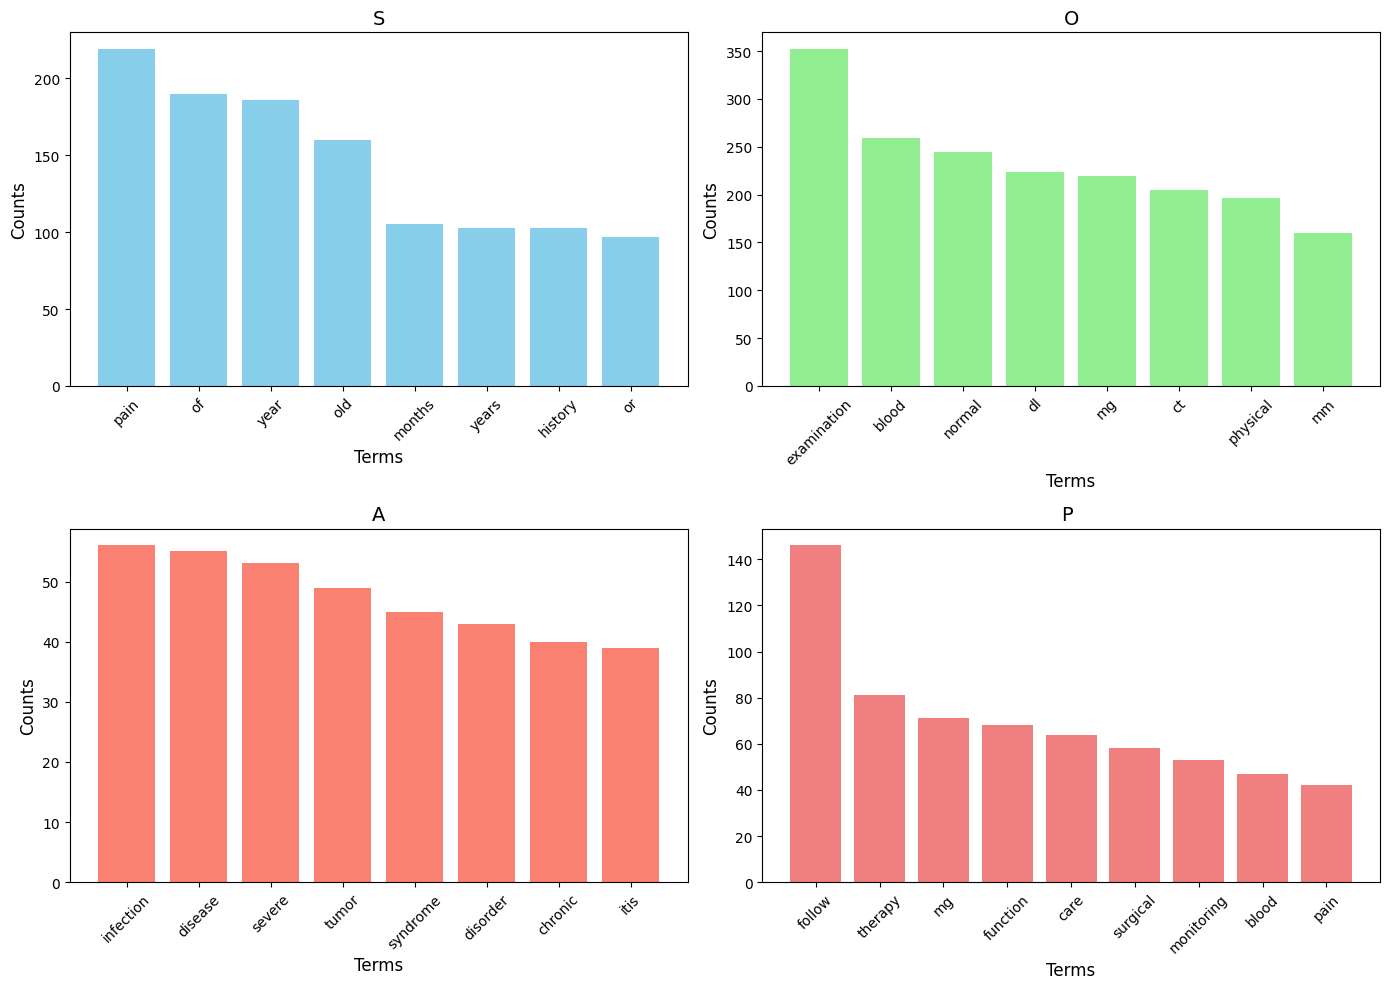

In [ ]:
import matplotlib.pyplot as plt

# Data for each category
S_data = [('pain', 219), ('of', 190), ('year', 186), ('old', 160), ('months', 105), ('years', 103), ('history', 103), ('or', 97)]
O_data = [('examination', 352),('blood', 259), ('normal', 244),('dl', 224), ('mg', 219), ('ct', 205), ('physical', 196), ('mm', 160)]
A_data = [('infection', 56), ('disease', 55), ('severe', 53), ('tumor', 49), ('syndrome', 45), ('disorder', 43), ('chronic', 40), ('itis', 39)]
P_data = [('follow', 146), ('therapy', 81), ('mg', 71), ('function', 68), ('care', 64), ('surgical', 58), ('monitoring', 53), ('blood', 47), ('pain', 42)]

# Create subplots for each category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot S (SIGN_SYMPTOM)
S_terms, S_counts = zip(*S_data)
axes[0, 0].bar(S_terms, S_counts, color='skyblue')
axes[0, 0].set_title('S', fontsize=14)
axes[0, 0].set_xlabel('Terms', fontsize=12)
axes[0, 0].set_ylabel('Counts', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot O (DIAGNOSTIC_PROCEDURE)
O_terms, O_counts = zip(*O_data)
axes[0, 1].bar(O_terms, O_counts, color='lightgreen')
axes[0, 1].set_title('O', fontsize=14)
axes[0, 1].set_xlabel('Terms', fontsize=12)
axes[0, 1].set_ylabel('Counts', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot A (DISEASE_DISORDER)
A_terms, A_counts = zip(*A_data)
axes[1, 0].bar(A_terms, A_counts, color='salmon')
axes[1, 0].set_title('A', fontsize=14)
axes[1, 0].set_xlabel('Terms', fontsize=12)
axes[1, 0].set_ylabel('Counts', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot P (THERAPEUTIC_PROCEDURE)
P_terms, P_counts = zip(*P_data)
axes[1, 1].bar(P_terms, P_counts, color='lightcoral')
axes[1, 1].set_title('P ', fontsize=14)
axes[1, 1].set_xlabel('Terms', fontsize=12)
axes[1, 1].set_ylabel('Counts', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

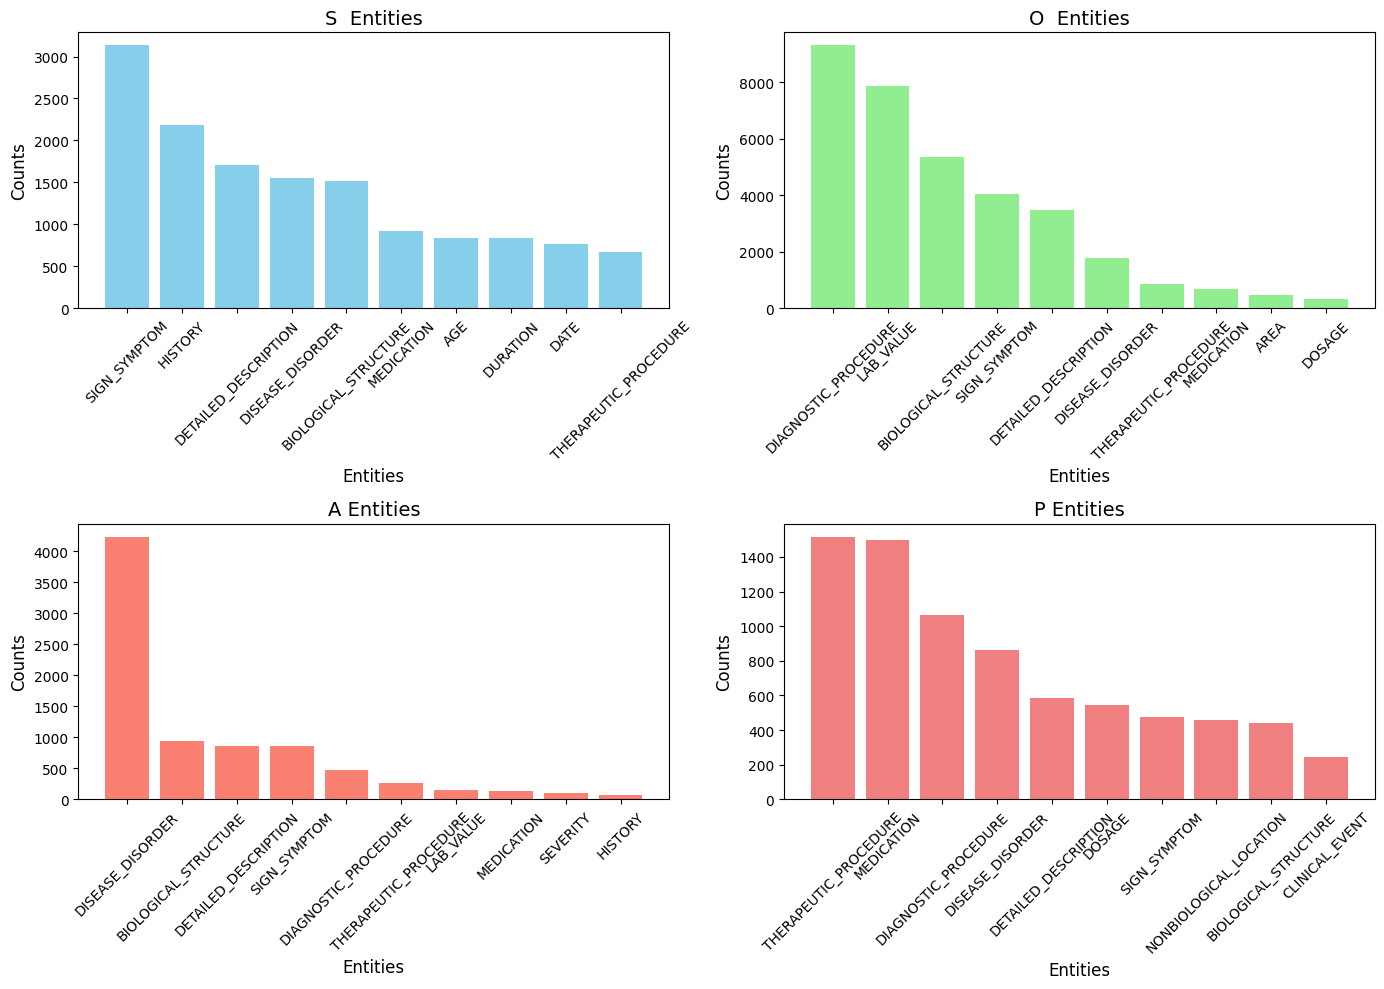

In [ ]:
import matplotlib.pyplot as plt

# Entity Data for each category (S, O, A, P)
S_entities = [('SIGN_SYMPTOM', 3132), ('HISTORY', 2180), ('DETAILED_DESCRIPTION', 1703),
              ('DISEASE_DISORDER', 1549), ('BIOLOGICAL_STRUCTURE', 1521), ('MEDICATION', 922),
              ('AGE', 837), ('DURATION', 837), ('DATE', 763), ('THERAPEUTIC_PROCEDURE', 666)]

O_entities = [('DIAGNOSTIC_PROCEDURE', 9296), ('LAB_VALUE', 7863), ('BIOLOGICAL_STRUCTURE', 5335),
              ('SIGN_SYMPTOM', 4034), ('DETAILED_DESCRIPTION', 3483), ('DISEASE_DISORDER', 1758),
              ('THERAPEUTIC_PROCEDURE', 838), ('MEDICATION', 690), ('AREA', 462), ('DOSAGE', 334)]

A_entities = [('DISEASE_DISORDER', 4237), ('BIOLOGICAL_STRUCTURE', 938), ('DETAILED_DESCRIPTION', 861),
              ('SIGN_SYMPTOM', 857), ('DIAGNOSTIC_PROCEDURE', 481), ('THERAPEUTIC_PROCEDURE', 264),
              ('LAB_VALUE', 156), ('MEDICATION', 129), ('SEVERITY', 105), ('HISTORY', 68)]

P_entities = [('THERAPEUTIC_PROCEDURE', 1517), ('MEDICATION', 1495), ('DIAGNOSTIC_PROCEDURE', 1062),
              ('DISEASE_DISORDER', 862), ('DETAILED_DESCRIPTION', 584), ('DOSAGE', 544),
              ('SIGN_SYMPTOM', 478), ('NONBIOLOGICAL_LOCATION', 457), ('BIOLOGICAL_STRUCTURE', 440),
              ('CLINICAL_EVENT', 245)]

# Create subplots for each category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot S (SIGN_SYMPTOM) Entities
S_terms, S_counts = zip(*S_entities)
axes[0, 0].bar(S_terms, S_counts, color='skyblue')
axes[0, 0].set_title('S  Entities', fontsize=14)
axes[0, 0].set_xlabel('Entities', fontsize=12)
axes[0, 0].set_ylabel('Counts', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot O (DIAGNOSTIC_PROCEDURE) Entities
O_terms, O_counts = zip(*O_entities)
axes[0, 1].bar(O_terms, O_counts, color='lightgreen')
axes[0, 1].set_title('O  Entities', fontsize=14)
axes[0, 1].set_xlabel('Entities', fontsize=12)
axes[0, 1].set_ylabel('Counts', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot A (DISEASE_DISORDER) Entities
A_terms, A_counts = zip(*A_entities)
axes[1, 0].bar(A_terms, A_counts, color='salmon')
axes[1, 0].set_title('A Entities', fontsize=14)
axes[1, 0].set_xlabel('Entities', fontsize=12)
axes[1, 0].set_ylabel('Counts', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot P (THERAPEUTIC_PROCEDURE) Entities
P_terms, P_counts = zip(*P_entities)
axes[1, 1].bar(P_terms, P_counts, color='lightcoral')
axes[1, 1].set_title('P Entities', fontsize=14)
axes[1, 1].set_xlabel('Entities', fontsize=12)
axes[1, 1].set_ylabel('Counts', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Word-to-category mappings
word_to_category = {
    'pain': ['S', 'P'],
    'blood': ['O', 'P'],
    'mg': ['O', 'P'],
    'left': ['S', 'O', 'A'],
    'right': ['S', 'O', 'A'],
    'report': ['S'],
    'reports': ['S'],
    'diagnosis': ['A'],
    'tumor': ['A'],
    'device': ['P'],
    'headache': ['S'],
    'procedure': ['P'],
    'prescribe': ['P'],
    'medication': ['P'],
    'pressure': ['O'],
    'implant': ['P'],
    'follow-up': ['P'],
    'follow': ['P'],
    # Add more words as needed
}

# Entity-to-category mappings
entity_to_category = {
    'SIGN_SYMPTOM': 'S',
    'HISTORY': 'S',
    'DISEASE_DISORDER': 'A',
    'BIOLOGICAL_STRUCTURE': 'O',
    'THERAPEUTIC_PROCEDURE': 'P',
    'DIAGNOSTIC_PROCEDURE': 'O',
    'LAB_VALUE': 'O',
    'MEDICATION': 'P',
    'SEVERITY': 'A',
    'DOSAGE': 'P',
    'ANATOMICAL_SITE': 'O',
    'MEDICAL_DEVICE': 'P',
    # Add more entities as needed
}

# Function to classify a sentence
def classify_sentence(sentence, entities):
    doc = nlp(sentence.lower())
    word_category_counts = {}

    # Step 1: Word Check
    for token in doc:
        word = token.lemma_
        if word in word_to_category:
            categories = word_to_category[word]
            for category in categories:
                word_category_counts[category] = word_category_counts.get(category, 0) + 1

    if word_category_counts:
        # Find categories with the highest counts
        max_count = max(word_category_counts.values())
        top_categories = [cat for cat, count in word_category_counts.items() if count == max_count]
        if len(top_categories) == 1:
            return top_categories[0]
        else:
            # Tie in word categories, proceed to Entity Check
            pass
    else:
        # No word categories found, proceed to Entity Check
        top_categories = []

    # Step 2: Entity Check
    entity_category_counts = {}
    for entity in entities:
        if entity in entity_to_category:
            category = entity_to_category[entity]
            entity_category_counts[category] = entity_category_counts.get(category, 0) + 1

    if entity_category_counts:
        # Find categories with the highest counts
        max_count = max(entity_category_counts.values())
        top_entity_categories = [cat for cat, count in entity_category_counts.items() if count == max_count]
        if len(top_entity_categories) == 1:
            return top_entity_categories[0]
        else:
            # Tie in entity categories, classify as "Not sure"
            return "Not sure"
    else:
        # No entity categories found, classify as "Other"
        return "Other"

# Example dataset
data = [
    {"text": "The patient reports pain in the left arm.", "entities": ["SIGN_SYMPTOM", "BIOLOGICAL_STRUCTURE"]},
    {"text": "Blood results show a normal range of 120 mg/dL.", "entities": ["LAB_VALUE"]},
    {"text": "Diagnosis consistent with chronic kidney disease.", "entities": ["DISEASE_DISORDER"]},
    {"text": "Follow-up care includes monitoring blood pressure.", "entities": ["THERAPEUTIC_PROCEDURE"]},
    {"text": "The tumor is located in the left lung.", "entities": ["DISEASE_DISORDER", "BIOLOGICAL_STRUCTURE"]},
    {"text": "Patient prescribed 5 mg of medication X daily.", "entities": ["DOSAGE", "MEDICATION"]},
    {"text": "Severe headache reported after the procedure.", "entities": ["SEVERITY", "SIGN_SYMPTOM"]},
    {"text": "An MRI scan was performed on the right knee.", "entities": ["DIAGNOSTIC_PROCEDURE", "ANATOMICAL_SITE"]},
    {"text": "The device was implanted successfully.", "entities": ["MEDICAL_DEVICE"]},
]

# Classify each sentence
for item in data:
    sentence = item["text"]
    entities = item["entities"]
    category = classify_sentence(sentence, entities)
    print(f"Sentence: {sentence}\nEntities: {entities}\nCategory: {category}\n")


Sentence: The patient reports pain in the left arm.
Entities: ['SIGN_SYMPTOM', 'BIOLOGICAL_STRUCTURE']
Category: S

Sentence: Blood results show a normal range of 120 mg/dL.
Entities: ['LAB_VALUE']
Category: O

Sentence: Diagnosis consistent with chronic kidney disease.
Entities: ['DISEASE_DISORDER']
Category: A

Sentence: Follow-up care includes monitoring blood pressure.
Entities: ['THERAPEUTIC_PROCEDURE']
Category: P

Sentence: The tumor is located in the left lung.
Entities: ['DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE']
Category: A

Sentence: Patient prescribed 5 mg of medication X daily.
Entities: ['DOSAGE', 'MEDICATION']
Category: P

Sentence: Severe headache reported after the procedure.
Entities: ['SEVERITY', 'SIGN_SYMPTOM']
Category: S

Sentence: An MRI scan was performed on the right knee.
Entities: ['DIAGNOSTIC_PROCEDURE', 'ANATOMICAL_SITE']
Category: O

Sentence: The device was implanted successfully.
Entities: ['MEDICAL_DEVICE']
Category: P



In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Word-to-category mappings using only the provided words
word_to_category = {}

# Words for each category from your provided data
category_words = {
    'S': ['pain', 'of', 'year', 'old', 'left', 'right', 'months', 'years', 'history', 'or'],
    'O': ['examination', 'left', 'blood', 'normal', 'right', 'dl', 'mg', 'ct', 'physical', 'mm'],
    'A': ['infection', 'disease', 'severe', 'right', 'left', 'tumor', 'syndrome', 'disorder', 'chronic', 'itis'],
    'P': ['follow', 'therapy', 'mg', 'function', 'care', 'surgical', 'up', 'monitoring', 'blood', 'pain']
}

# Build the word_to_category mapping
for category, words in category_words.items():
    for word in words:
        if word in word_to_category:
            word_to_category[word].append(category)
        else:
            word_to_category[word] = [category]

# Entity-to-category mappings (assuming these are acceptable)
entity_to_category = {
    'SIGN_SYMPTOM': 'S',
    'HISTORY': 'S',
    'DISEASE_DISORDER': 'A',
    'BIOLOGICAL_STRUCTURE': 'O',
    'THERAPEUTIC_PROCEDURE': 'P',
    'DIAGNOSTIC_PROCEDURE': 'O',
    'LAB_VALUE': 'O',
    'MEDICATION': 'P',
    'SEVERITY': 'A',
    'DOSAGE': 'P',
    'ANATOMICAL_SITE': 'O',
    'MEDICAL_DEVICE': 'P',
    # Assuming entities are acceptable as is
}

# Function to classify a sentence
def classify_sentence(sentence, entities):
    doc = nlp(sentence.lower())
    word_category_counts = {}

    # Step 1: Word Check using only the provided words
    for token in doc:
        word = token.lemma_
        if word in word_to_category:
            categories = word_to_category[word]
            for category in categories:
                word_category_counts[category] = word_category_counts.get(category, 0) + 1

    if word_category_counts:
        # Find categories with the highest counts
        max_count = max(word_category_counts.values())
        top_categories = [cat for cat, count in word_category_counts.items() if count == max_count]
        if len(top_categories) == 1:
            return top_categories[0]
        else:
            # Tie in word categories, proceed to Entity Check
            pass
    else:
        # No word categories found, proceed to Entity Check
        top_categories = []

    # Step 2: Entity Check
    entity_category_counts = {}
    for entity in entities:
        if entity in entity_to_category:
            category = entity_to_category[entity]
            entity_category_counts[category] = entity_category_counts.get(category, 0) + 1

    if entity_category_counts:
        # Find categories with the highest counts
        max_count = max(entity_category_counts.values())
        top_entity_categories = [cat for cat, count in entity_category_counts.items() if count == max_count]
        if len(top_entity_categories) == 1:
            return top_entity_categories[0]
        else:
            # Tie in entity categories, classify as "Not sure"
            return "Not sure"
    else:
        # No entity categories found, classify as "Other"
        return "Other"

# Example dataset
data = [
    {"text": "The patient reports pain in the left arm.", "entities": ["SIGN_SYMPTOM", "BIOLOGICAL_STRUCTURE"]},
    {"text": "Blood results show a normal range of 120 mg/dL.", "entities": ["LAB_VALUE"]},
    {"text": "Diagnosis consistent with chronic kidney disease.", "entities": ["DISEASE_DISORDER"]},
    {"text": "Follow-up care includes monitoring blood pressure.", "entities": ["THERAPEUTIC_PROCEDURE"]},
    {"text": "The tumor is located in the left lung.", "entities": ["DISEASE_DISORDER", "BIOLOGICAL_STRUCTURE"]},
    {"text": "Patient prescribed 5 mg of medication X daily.", "entities": ["DOSAGE", "MEDICATION"]},
    {"text": "Severe headache reported after the procedure.", "entities": ["SEVERITY", "SIGN_SYMPTOM"]},
    {"text": "An MRI scan was performed on the right knee.", "entities": ["DIAGNOSTIC_PROCEDURE", "ANATOMICAL_SITE"]},
    {"text": "The device was implanted successfully.", "entities": ["MEDICAL_DEVICE"]},
]

# Classify each sentence
for item in data:
    sentence = item["text"]
    entities = item["entities"]
    category = classify_sentence(sentence, entities)
    print(f"Sentence: {sentence}\nEntities: {entities}\nCategory: {category}\n")


Sentence: The patient reports pain in the left arm.
Entities: ['SIGN_SYMPTOM', 'BIOLOGICAL_STRUCTURE']
Category: S

Sentence: Blood results show a normal range of 120 mg/dL.
Entities: ['LAB_VALUE']
Category: O

Sentence: Diagnosis consistent with chronic kidney disease.
Entities: ['DISEASE_DISORDER']
Category: A

Sentence: Follow-up care includes monitoring blood pressure.
Entities: ['THERAPEUTIC_PROCEDURE']
Category: P

Sentence: The tumor is located in the left lung.
Entities: ['DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE']
Category: A

Sentence: Patient prescribed 5 mg of medication X daily.
Entities: ['DOSAGE', 'MEDICATION']
Category: P

Sentence: Severe headache reported after the procedure.
Entities: ['SEVERITY', 'SIGN_SYMPTOM']
Category: A

Sentence: An MRI scan was performed on the right knee.
Entities: ['DIAGNOSTIC_PROCEDURE', 'ANATOMICAL_SITE']
Category: O

Sentence: The device was implanted successfully.
Entities: ['MEDICAL_DEVICE']
Category: P



In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Words per category as provided
category_words = {
    'S': ['pain', 'of', 'year', 'old', 'left', 'right', 'months', 'years', 'history', 'or'],
    'O': ['examination', 'left', 'blood', 'normal', 'right', 'dl', 'mg', 'ct', 'physical', 'mm'],
    'A': ['infection', 'disease', 'severe', 'right', 'left', 'tumor', 'syndrome', 'disorder', 'chronic', 'itis'],
    'P': ['follow', 'therapy', 'mg', 'function', 'care', 'surgical', 'up', 'monitoring', 'blood', 'pain']
}

# Build word_to_category mapping
word_to_category = {}
for category, words in category_words.items():
    for word in words:
        if word in word_to_category:
            word_to_category[word].append(category)
        else:
            word_to_category[word] = [category]

# Entities per category as provided
category_entities = {
    'S': ['SIGN_SYMPTOM', 'HISTORY', 'DETAILED_DESCRIPTION', 'DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE',
          'MEDICATION', 'AGE', 'DURATION', 'DATE', 'THERAPEUTIC_PROCEDURE'],
    'O': ['DIAGNOSTIC_PROCEDURE', 'LAB_VALUE', 'BIOLOGICAL_STRUCTURE', 'SIGN_SYMPTOM', 'DETAILED_DESCRIPTION',
          'DISEASE_DISORDER', 'THERAPEUTIC_PROCEDURE', 'MEDICATION', 'AREA', 'DOSAGE'],
    'A': ['DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE', 'DETAILED_DESCRIPTION', 'SIGN_SYMPTOM', 'DIAGNOSTIC_PROCEDURE',
          'THERAPEUTIC_PROCEDURE', 'LAB_VALUE', 'MEDICATION', 'SEVERITY', 'HISTORY'],
    'P': ['THERAPEUTIC_PROCEDURE', 'MEDICATION', 'DIAGNOSTIC_PROCEDURE', 'DISEASE_DISORDER', 'DETAILED_DESCRIPTION',
          'DOSAGE', 'SIGN_SYMPTOM', 'NONBIOLOGICAL_LOCATION', 'BIOLOGICAL_STRUCTURE', 'CLINICAL_EVENT']
}

# Build entity_to_category mapping
entity_to_category = {}
for category, entities in category_entities.items():
    for entity in entities:
        if entity in entity_to_category:
            entity_to_category[entity].append(category)
        else:
            entity_to_category[entity] = [category]

# Function to classify a sentence
def classify_sentence(sentence, entities):
    doc = nlp(sentence.lower())
    word_category_counts = {}

    # Step 1: Word Check
    for token in doc:
        word = token.lemma_
        if word in word_to_category:
            categories = word_to_category[word]
            for category in categories:
                word_category_counts[category] = word_category_counts.get(category, 0) + 1

    if word_category_counts:
        # Find categories with the highest counts
        max_count = max(word_category_counts.values())
        top_categories = [cat for cat, count in word_category_counts.items() if count == max_count]
        if len(top_categories) == 1:
            return top_categories[0]
        else:
            # Tie in word categories, proceed to Entity Check
            pass
    else:
        # No word categories found, proceed to Entity Check
        top_categories = []

    # Step 2: Entity Check
    entity_category_counts = {}
    for entity in entities:
        if entity in entity_to_category:
            categories = entity_to_category[entity]
            for category in categories:
                entity_category_counts[category] = entity_category_counts.get(category, 0) + 1

    if entity_category_counts:
        # Find categories with the highest counts
        max_count = max(entity_category_counts.values())
        top_entity_categories = [cat for cat, count in entity_category_counts.items() if count == max_count]
        if len(top_entity_categories) == 1:
            return top_entity_categories[0]
        else:
            # Tie in entity categories, classify as "Not sure"
            return "Not sure"
    else:
        # No entity categories found, classify as "Other"
        return "Other"

# Example dataset
data = [
    {"text": "The patient reports pain in the left arm.", "entities": ["SIGN_SYMPTOM", "BIOLOGICAL_STRUCTURE"]},
    {"text": "Blood results show a normal range of 120 mg/dL.", "entities": ["LAB_VALUE"]},
    {"text": "Diagnosis consistent with chronic kidney disease.", "entities": ["DISEASE_DISORDER"]},
    {"text": "Follow-up care includes monitoring blood pressure.", "entities": ["THERAPEUTIC_PROCEDURE"]},
    {"text": "The tumor is located in the left lung.", "entities": ["DISEASE_DISORDER", "BIOLOGICAL_STRUCTURE"]},
    {"text": "Patient prescribed 5 mg of medication X daily.", "entities": ["DOSAGE", "MEDICATION"]},
    {"text": "Severe headache reported after the procedure.", "entities": ["SEVERITY", "SIGN_SYMPTOM"]},
    {"text": "An MRI scan was performed on the right knee.", "entities": ["DIAGNOSTIC_PROCEDURE", "ANATOMICAL_SITE"]},
    {"text": "The device was implanted successfully.", "entities": ["MEDICAL_DEVICE"]},
]

# Classify each sentence
for item in data:
    sentence = item["text"]
    entities = item["entities"]
    category = classify_sentence(sentence, entities)
    print(f"Sentence: {sentence}\nEntities: {entities}\nCategory: {category}\n")


Sentence: The patient reports pain in the left arm.
Entities: ['SIGN_SYMPTOM', 'BIOLOGICAL_STRUCTURE']
Category: S

Sentence: Blood results show a normal range of 120 mg/dL.
Entities: ['LAB_VALUE']
Category: O

Sentence: Diagnosis consistent with chronic kidney disease.
Entities: ['DISEASE_DISORDER']
Category: A

Sentence: Follow-up care includes monitoring blood pressure.
Entities: ['THERAPEUTIC_PROCEDURE']
Category: P

Sentence: The tumor is located in the left lung.
Entities: ['DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE']
Category: A

Sentence: Patient prescribed 5 mg of medication X daily.
Entities: ['DOSAGE', 'MEDICATION']
Category: Not sure

Sentence: Severe headache reported after the procedure.
Entities: ['SEVERITY', 'SIGN_SYMPTOM']
Category: A

Sentence: An MRI scan was performed on the right knee.
Entities: ['DIAGNOSTIC_PROCEDURE', 'ANATOMICAL_SITE']
Category: Not sure

Sentence: The device was implanted successfully.
Entities: ['MEDICAL_DEVICE']
Category: Other



In [ ]:
import spacy
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Load the tokenizer and model for NER
tokenizer = AutoTokenizer.from_pretrained("blaze999/Medical-NER")
model = AutoModelForTokenClassification.from_pretrained("blaze999/Medical-NER")

# Create an NER pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Words per category as provided
category_words = {
    'S': ['pain', 'of', 'year', 'old', 'left', 'right', 'months', 'years', 'history', 'or'],
    'O': ['examination', 'left', 'blood', 'normal', 'right', 'dl', 'mg', 'ct', 'physical', 'mm'],
    'A': ['infection', 'disease', 'severe', 'right', 'left', 'tumor', 'syndrome', 'disorder', 'chronic', 'itis'],
    'P': ['follow', 'therapy', 'mg', 'function', 'care', 'surgical', 'up', 'monitoring', 'blood', 'pain']
}

# Build word_to_category mapping
word_to_category = {}
for category, words in category_words.items():
    for word in words:
        if word in word_to_category:
            word_to_category[word].append(category)
        else:
            word_to_category[word] = [category]

# Entities per category as provided
category_entities = {
    'S': ['SIGN_SYMPTOM', 'HISTORY', 'DETAILED_DESCRIPTION', 'DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE',
          'MEDICATION', 'AGE', 'DURATION', 'DATE', 'THERAPEUTIC_PROCEDURE'],
    'O': ['DIAGNOSTIC_PROCEDURE', 'LAB_VALUE', 'BIOLOGICAL_STRUCTURE', 'SIGN_SYMPTOM', 'DETAILED_DESCRIPTION',
          'DISEASE_DISORDER', 'THERAPEUTIC_PROCEDURE', 'MEDICATION', 'AREA', 'DOSAGE'],
    'A': ['DISEASE_DISORDER', 'BIOLOGICAL_STRUCTURE', 'DETAILED_DESCRIPTION', 'SIGN_SYMPTOM', 'DIAGNOSTIC_PROCEDURE',
          'THERAPEUTIC_PROCEDURE', 'LAB_VALUE', 'MEDICATION', 'SEVERITY', 'HISTORY'],
    'P': ['THERAPEUTIC_PROCEDURE', 'MEDICATION', 'DIAGNOSTIC_PROCEDURE', 'DISEASE_DISORDER', 'DETAILED_DESCRIPTION',
          'DOSAGE', 'SIGN_SYMPTOM', 'NONBIOLOGICAL_LOCATION', 'BIOLOGICAL_STRUCTURE', 'CLINICAL_EVENT']
}

# Build entity_to_category mapping
entity_to_category = {}
for category, entities in category_entities.items():
    for entity in entities:
        if entity in entity_to_category:
            entity_to_category[entity].append(category)
        else:
            entity_to_category[entity] = [category]

# Function to classify a sentence
def classify_sentence(sentence):
    doc = nlp(sentence.lower())
    word_category_counts = {}

    # Step 1: Word Check
    for token in doc:
        word = token.lemma_
        if word in word_to_category:
            categories = word_to_category[word]
            for category in categories:
                word_category_counts[category] = word_category_counts.get(category, 0) + 1

    if word_category_counts:
        # Find categories with the highest counts
        max_count = max(word_category_counts.values())
        top_categories = [cat for cat, count in word_category_counts.items() if count == max_count]
        if len(top_categories) == 1:
            return top_categories[0]
        else:
            # Tie in word categories, proceed to Entity Check using NER model
            entities = extract_entities(sentence)
    else:
        # No word categories found, proceed to Entity Check using NER model
        entities = extract_entities(sentence)

    # Step 2: Entity Check
    entity_category_counts = {}
    for entity_label in entities:
        if entity_label in entity_to_category:
            categories = entity_to_category[entity_label]
            for category in categories:
                entity_category_counts[category] = entity_category_counts.get(category, 0) + 1

    if entity_category_counts:
        # Find categories with the highest counts
        max_count = max(entity_category_counts.values())
        top_entity_categories = [cat for cat, count in entity_category_counts.items() if count == max_count]
        if len(top_entity_categories) == 1:
            return top_entity_categories[0]
        else:
            # Tie in entity categories, classify as "Not sure"
            return "Not sure"
    else:
        # No entity categories found, classify as "Other"
        return "Other"

# Function to extract entities using the NER model
def extract_entities(sentence):
    ner_results = ner_pipeline(sentence)
    extracted_entities = set()
    for entity in ner_results:
        label = entity['entity_group']
        label = label.replace('B-', '').replace('I-', '')
        extracted_entities.add(label)
    return list(extracted_entities)

# Example dataset (without pre-defined entities)
data = [
    {"text": "The patient reports pain in the left arm."},
    {"text": "Blood results show a normal range of 120 mg/dL."},
    {"text": "Diagnosis consistent with chronic kidney disease."},
    {"text": "Follow-up care includes monitoring blood pressure."},
    {"text": "The tumor is located in the left lung."},
    {"text": "Patient prescribed 5 mg of medication X daily."},
    {"text": "Severe headache reported after the procedure."},
    {"text": "An MRI scan was performed on the right knee."},
    {"text": "The device was implanted successfully."},
]

# Classify each sentence
for item in data:
    sentence = item["text"]
    category = classify_sentence(sentence)
    print(f"Sentence: {sentence}\nCategory: {category}\n")


Sentence: The patient reports pain in the left arm.
Category: S

Sentence: Blood results show a normal range of 120 mg/dL.
Category: O

Sentence: Diagnosis consistent with chronic kidney disease.
Category: A



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentence: Follow-up care includes monitoring blood pressure.
Category: P

Sentence: The tumor is located in the left lung.
Category: A

Sentence: Patient prescribed 5 mg of medication X daily.
Category: Not sure

Sentence: Severe headache reported after the procedure.
Category: A

Sentence: An MRI scan was performed on the right knee.
Category: Not sure

Sentence: The device was implanted successfully.
Category: Other



In [ ]:

import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline


tokenizer = AutoTokenizer.from_pretrained("blaze999/Medical-NER")
model = AutoModelForTokenClassification.from_pretrained("blaze999/Medical-NER")

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Falconsai/medical_summarization")

In [ ]:
import pandas as pd
ds=pd.read_csv("/content/drive/MyDrive/MT_speech/SOAP_Files/sentences.csv")
text=[]
classes=[]
for i,a in zip(ds["Entity"],ds["Word"]):
  i=i[2:-2]
  text.append(i)
  a=a[2:-2]
  # if "S" in a:
  #   a=0
  # elif "Other" in a:
  #   a=4
  # elif "O" in a:
  #   a=1
  # elif "A" in a:
  #   a=2
  # elif "P" in a:
  #   a=3
  # else:
  #   continue

  classes.append(a)


from datasets import Dataset, DatasetDict



# Split into train and test
train_data = [{"input": t, "output": c} for t, c in zip(text[:3000], classes[:3000])]
test_data = [{"input": t, "output": c} for t, c in zip(text[3000:], classes[3000:])]

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_list(train_data)
test_dataset = Dataset.from_list(test_data)

# Combine into DatasetDict
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# Print dataset details
print(dataset)







DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['input', 'output'],
        num_rows: 5182
    })
})


In [ ]:
words={}
for i in ds["Word"]:
  if i in words:
    words[i]+=1
  else:
    words[i]=1


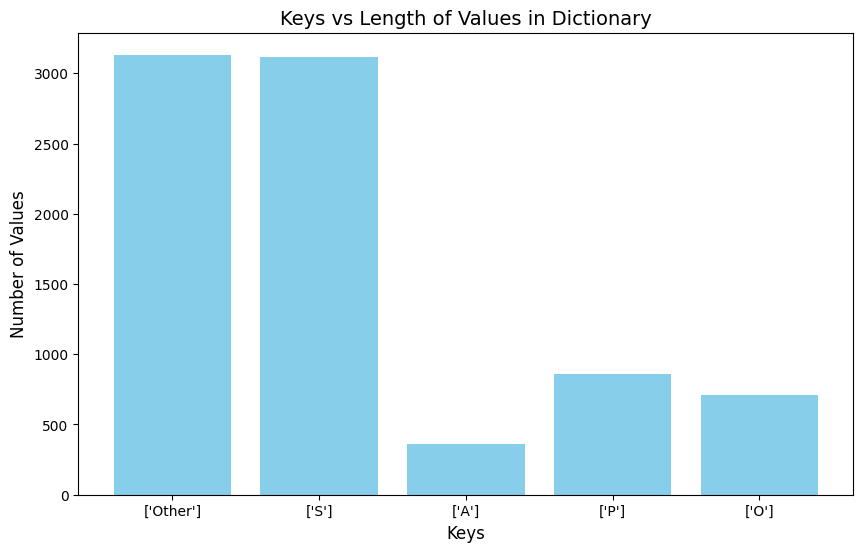

In [ ]:
import matplotlib.pyplot as plt
keys = list(words.keys())
values = [value_list for value_list in words.values()]  # Use length of value list as y-values

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

# Add titles and labels
plt.title("Keys vs Length of Values in Dictionary", fontsize=14)
plt.xlabel("Keys", fontsize=12)
plt.ylabel("Number of Values", fontsize=12)

# Show the plot
plt.show()

In [ ]:
ds=dataset

In [ ]:
# Preprocessing function remains the same
def preprocess_data(batch):
    inputs = tokenizer(batch['input'], truncation=True, padding="max_length", max_length=512)
    outputs = tokenizer(batch['output'], truncation=True, padding="max_length", max_length=256)
    inputs["labels"] = outputs["input_ids"]
    return inputs

# Handling a list for training and testing datasets
tokenized_dataset_train = [preprocess_data(batch) for batch in ds["train"]]
tokenized_dataset_validation = [preprocess_data(batch) for batch in ds["test"]]


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="no",  # Disable validation
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=100,
    save_total_limit=2,
    lr_scheduler_type='cosine',
    load_best_model_at_end=False,  # Disable loading best model since no validation
)



In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained("Falconsai/medical_summarization",num_labels=5)

In [ ]:
from transformers import Trainer, DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_train,
    eval_dataset=None,  # Split dataset if needed
    tokenizer=tokenizer,
    data_collator=data_collator,
)


<ipython-input-33-ec8ccdd1fb3b>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


Step,Training Loss
100,5.286500
200,0.122600
300,0.047300
400,0.035600
500,0.015800
600,0.011700
700,0.010600
800,0.007800
900,0.007700
1000,0.007500


TrainOutput(global_step=1500, training_loss=0.3724116431077321, metrics={'train_runtime': 208.5394, 'train_samples_per_second': 14.386, 'train_steps_per_second': 7.193, 'total_flos': 406025404416000.0, 'train_loss': 0.3724116431077321, 'epoch': 1.0})

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)  # For classification
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    accuracy = accuracy_score(labels, preds)
    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
    }


In [ ]:
test_dataset=tokenized_dataset_validation
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset[:100],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


# Evaluate the model
results = trainer.evaluate(eval_dataset=test_dataset[:100])
print(results)


<ipython-input-39-ccbeed4c48ad>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


OutOfMemoryError: CUDA out of memory. Tried to allocate 1004.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 189.06 MiB is free. Process 79861 has 14.56 GiB memory in use. Of the allocated memory 12.84 GiB is allocated by PyTorch, and 1.59 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model.to("cpu")

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
import torch
device = torch.device("cpu")
model.to(device)

# Ensure datasets are also compatible with the CPU
def preprocess_data(batch):
    inputs = tokenizer(batch['input'], truncation=True, padding="max_length", max_length=512, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move all inputs to CPU
    outputs = tokenizer(batch['output'], truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    outputs = {k: v.to(device) for k, v in outputs.items()}  # Move outputs to CPU
    inputs["labels"] = outputs["input_ids"]
    return inputs

# Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=100,
    save_total_limit=2,
    load_best_model_at_end=True,
    no_cuda=True,  # Enforce CPU usage
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    # Extract logits and apply argmax to get predicted class indices
    logits = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    preds = logits.argmax(-1)  # Convert logits to predicted class indices

    # Extract true labels
    labels = pred.label_ids

    # Ensure both are flattened if necessary
    preds = preds.flatten()
    labels = labels.flatten()

    # Compute metrics
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    accuracy = accuracy_score(labels, preds)

    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
    }

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Replace with your train dataset
    eval_dataset=test_dataset,    # Replace with your test dataset
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Define your metrics function
)



# Evaluate the model
results = trainer.evaluate(eval_dataset=test_dataset[:100])
print(results)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1583: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(
<ipython-input-46-c585b1b37d64>:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.005821379832923412, 'eval_model_preparation_time': 0.0028, 'eval_precision': 0.9974940600622957, 'eval_recall': 0.9982421875, 'eval_f1': 0.9977927763181998, 'eval_accuracy': 0.9982421875, 'eval_runtime': 225.9002, 'eval_samples_per_second': 0.443, 'eval_steps_per_second': 0.443}
